In this notebook, we'll cover one of the major algorithms used in Supervised Learning--**Support Vector Machines** (or SVMs for short!). We'll start by playing around with a visual implementation to gain an intuition for how SVMs work, and then we'll grab an SVM implementation from sklearn and use to it make some classifcations on a real world data set.

at first glance, SVMs are similar to other supervised learning algorithms such as Logistic Regression, because the algorithm find the optimal line for a decision boundary. However, unlike Logistic Regression, SVMs don't just find a line for the decision boundary--they try to maximize the margin between the two sides.

The points that touch the sides of the margin are called **support vectors**. By maximizing the margin by finding support vectors, this has the effect of "balancing" the the decision boundary so that it evenly splits the area between the two classes. This is not always the case with Logistic Regression--see the image below for a visual example.

Notice that on the image on the right, the line is a bit skewed through the datapoints. This is a problem that can occur with Logistic Regression, since it's job is to fit a line that linearly separates the two classes. The line in the image on the right technically accomplishes this task, but we can see by looking at the decision boundary that this is not optimal. Contrast this with the decision boundary on the left, which splits the area between the two classes perfectly.

SVMs are not perfect, however--they only work when the data is **linearly separable**--that is, the decision boundary is linear, and can be drawn as a straight line. Take a look at the picture below, and consider where you would draw the ideal decision boundary to split the two--remember, it has to be a straight line!

The data is non linearly separable, so we can't draw a decision boundary--or can we? This is where the cool part of SVMs comes in--what if we mapped the data to a **higher-dimension space**--maybe we could draw a decision boundary there?

Ah, there it is! In this higher dimensional space, we can see an easy place to draw a linear decision boundary. It's important to note that in 2 dimensions, our decision boundary looks like a straight line--but for this data, in its current form, our decision boundary will need to look like a piece of paper (with no thickness). This is because our decision boundary will always have one less dimension than the data we are trying to find a decision boundary for. If our data has 4 dimensions (which we can't visualize), then our decision boundary would be a **hyperplane** that would look like a rectangle. We can generalize this rule to say that for any dataset with [n] dimensions, our decision boundary will have [n - 1] dimensions.

The process of mapping data to a higher-dimensional space is called the **Kernel Method**. There are several different kernels that are typically used, but the most common ones you'll typically need to know are the **Polynomial Kernel** and the **Radial Basis Function (RBF)**--these are complicated data transformations that any ML library worth its salt can handle for you. You don't need to know the math behind them, but you should definitely be aware that they exist, and that they are tools in your ML toolbox for SVMs!

### Let's review what we've done so far:

1. Determined that the data is not linearly separable in its current form.
2. Mapped the data to a higher dimensional space using a kernel method.
3. Found a linear decision boundary in the higher dimensional space.

### Now what?

Now that we've identified support vectors that allow us to linearly separate the data in a higher dimensional space, all that we need to do is to bring the data (and the decision boundary) back to our original, lower-dimensional space. If we visualize the decision boundary for our data in the lower-dimensional space, it will appear as a circle:

It's important to understand that although our decision boundary isn't linear in this lower-dimensional space, that's okay--we found a linear decision boundary in a higher-dimensional space and made our classifications, so we didn't actually break the rules of Support Vector Machines.

To make learning how SVMs work a bit easier, the sklearn community has built an awesome interactive visualization that lets users plot points and fit an SVM for binary classification. We **highly recommend** running this python script and getting a feel for how SVMs work--plot different data points and see how the decision boundary changes, try different kernel methods, visualize the decision surface of the SVM, etc. You'll find all of these activities very useful, and very interesting.

Check out [this link](http://scikit-learn.org/stable/auto_examples/applications/svm_gui.html#sphx-glr-auto-examples-applications-svm-gui-py) to see the page on sklearn.org that gives an example of how everything works. **To download the file, download and run the python script linked at the bottom of the page (use the script version, not the jupyter notebook!)**

For the remainder of this notebook, you'll use everything you've learned in DS2 to use a Support Vector Classifier on the [Wisconsin Breast Cancer Dataset](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). Note that you **do not need to download the dataset**, as it comes preloaded as a sample in sklearn. To get the data, just use the load_breast_cancer() method found within sklearn.datasets.

### Challenge:

1. Import and explore the dataset. Recall the load_breast_cancer() method will return an object that contains the data in .data, the labels in .target, and the column names in .feature_names attributes.
2. Build a Correlation Heatmap using Seaborn to check for each feature's correlation with the labels.
3. Build a second Correlation Heatmap using Seaborn to check for mutlicollinearity between features.
4. Scale and transform the data using a StandardScaler() object and any appropriate methods it contains.
5. Split the newly scaled data into training and testing sets using train_test_split().
6. Create an SVC() object, which can be found in sklearn.svm
7. Fit the model to the scaled data.
8. Use your validation data to check the accuracy metrics for your model.

### Stretch Challenge:

1. Try different parameters such as different kernels to see how it affects the overall performance of the model. For a full list of the tunable parameters you can use with an SVC, see [the documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on sklearn.org.

In [1]:
# Import and explore the dataset.
# Recall the load_breast_cancer() method will return an object that contains
#     the data in .data, the labels in .target, and the column names in .feature_names attributes.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import metrics, preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression

LBC = load_breast_cancer()
data  = LBC.data
labels = LBC.target
colms = LBC.feature_names
# print("data\n", data)
# print("labels\n", labels)
# print("colms\n", colms)

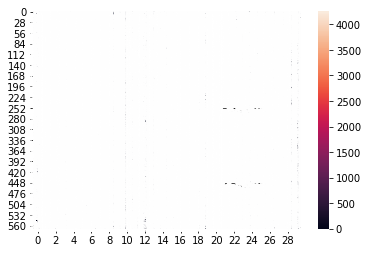

In [2]:
# Build a Correlation Heatmap using Seaborn to check for each feature's correlation with the labels.
sns.heatmap(data, annot=True)

# Build a second Correlation Heatmap using Seaborn to check for mutlicollinearity between features.



# # Calculate correlation between each pair of variable
# corr_matrix=LBC.corr()

# # plot it
# sns.heatmap(corr_matrix, cmap='PuOr')
# #sns.plt.show()

# # Can be great to plot only a half matrix
# mask = np.zeros_like(corr_matrix)
# mask[np.triu_indices_from(mask)] = True
# with sns.axes_style("white"):
#     p2 = sns.heatmap(corr_matrix, mask=mask, square=True)
# #sns.plt.show()

In [3]:
# X is a matrix, access the features we want in feature_cols
X = data
# y is a vector, hence we use dot to access 'label'
y = labels

# ----------------------4:Scale-------------------------------------------
"""Scale and transform the data using a StandardScaler() object and any appropriate methods it contains."""
standard_scaler = preprocessing.StandardScaler()
X_ss = standard_scaler.fit_transform(X)
# print(X_ss)

# min_max_scaler = preprocessing.MinMaxScaler()
# X_minmax = min_max_scaler.fit_transform(X_train)
# print(X_minmax)

# --------------------5:Split---------------------------------------------
"""Split the newly scaled data into training and testing sets using train_test_split()."""
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# --------------------6:SVC-----------------------------------------------
"""Create an SVC() object, which can be found in sklearn.svm"""
# We want to use a linear classification
svm_classifier = svm.SVC(kernel='linear', C=1.0)
# svm_classifier = svm.SVC(kernel='poly',C=1, degree=2)

# --------------------7:Fit-----------------------------------------------
"""Fit the model to the scaled data."""
# find the best fit line
svm_classifier.fit(X_train, y_train)

# ----------------------8:validation-check--------------------------------
"""Use your validation data to check the accuracy metrics for your model."""
# Compare y_prediction against actual value y_test
y_pred = svm_classifier.predict(X_test)
print("mean_squared_error\t", mean_squared_error(y_test, y_pred))
print("r2_score\t\t", r2_score(y_test, y_pred))

mean_squared_error	 0.04195804195804196
r2_score		 0.820125786163522


In [4]:
# # Helper function to plot the best fit line,
# # as well as marking the closest data points to the line,
# # through dotted lines (margins)
# def plot_decision_boundary(clf, X, y):
#     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
#     Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
#     plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
#     plt.xlim(xx1.min(), xx1.max())
#     plt.ylim(xx2.min(), xx2.max())


# # pass in the trained model and data points,
# # and plot the best fit line + margins
# plot_decision_boundary(svm_classifier, X_train, y_train)

# # plot data points + color/labels
# for k, (i,j) in enumerate(X_train):
#     plt.scatter(i, j, c = color_ls[k])
#     plt.text(i+0.02, j+0.02, label[k])

In [5]:
# Stretch Challenge:
# Try different parameters such as different kernels to see how it affects the overall performance of the model.
# For a full list of the tunable parameters you can use with an SVC, see the documentation on sklearn.org.


# fit the model and get the separating hyperplane using weighted classes
# wclf = svm.SVC(kernel='linear', class_weight={1: 10})
# wclf.fit(X, y)


### Confusion Matrix
A confusion matrix is a table that is used to describe the performance of a classifier on a set of test data where we know the true vales. Essentially, we use it to check how well our classifier's predicted values matched against the known values of the same data.

**True Positives (TP)**: we correctly predicted a positive outcome (i.e. someone has diabetes, and we correctly predicted it)
- How many 0s (no diabetes) in y_test are predicted correctly as 0 (no diabetes) in y_pred?

**True Negatives (TN)**: we correctly predicted a negative outcome (i.e. someone does not have diabetes, and we correctly predicted it)
- How many 1s (diabetes) in y_test are predicted correctly 1 (diabetes) in y_pred?

**False Positives (FP)**: we incorrectly predicted a positive outcome (i.e. someone does not diabetes, and we incorrectly said that they did)
- How many 0s (no diabetes) in y_test are predicted incorrectly as 1 (diabetes) in y_pred?

**False Negatives (FN)**: we incorrectly predicted a negative outcome (i.e. someone has diabetes, and we incorrectly said that they do not)
- How many 1s (diabetes) in y_test are predicted incorrectly as 0 (no diabetes) in y_pred?


### What is accuracy, recall, precision, Specificity and F1-score?
Accuracy, recall, precision, Specificity and F1-score are all obtained from Confision Matrix elements known as : TN, FP, FN, TP
Accuracy: overall, how often is the classifier correct? -> $accuracy = \frac {TP + TN}{TP+TN+FP+FN}$

Classification error: overall, how often is the classifier incorrect? -> $error = 1- accuracy = \frac {FP + FN}{TP + TN + FP + FN}$

Recall: when the actual value is positive, how often is the prediction correct? -> $recall = \frac {TP}{TP + FN}$

Precision: When a positive value is predicted, how often is the prediction correct? -> $precision = \frac {TP}{TP + FP}$

Specificity: When the actual value is negative, how often is the prediction correct? -> $Specificity = \frac {TN}{TN + FP}$

F1-score = 2 x (Precision x Recall )/(Precision + Recall)

In [6]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


accuracy=(𝑇𝑃+𝑇𝑁)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁)
print("𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦:", accuracy)

error=(𝐹𝑃+𝐹𝑁)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁)
print("𝑒𝑟𝑟𝑜𝑟 =1−𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦:", error)

𝑟𝑒𝑐𝑎𝑙𝑙=𝑇𝑃/(𝑇𝑃+𝐹𝑁)
print("𝑟𝑒𝑐𝑎𝑙𝑙", 𝑟𝑒𝑐𝑎𝑙𝑙)

𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=𝑇𝑃/(𝑇𝑃+𝐹𝑃)
print("𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛", 𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛)

𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦=𝑇𝑁/(𝑇𝑁+𝐹𝑃)
print("𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦", 𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦)

F1 = 2*(𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 * 𝑟𝑒𝑐𝑎𝑙𝑙 )/(𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 + 𝑟𝑒𝑐𝑎𝑙𝑙)
print("f1", F1)

[[52  1]
 [ 5 85]]
𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦: 0.958041958041958
𝑒𝑟𝑟𝑜𝑟 =1−𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦: 0.04195804195804196
𝑟𝑒𝑐𝑎𝑙𝑙 0.9444444444444444
𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 0.9883720930232558
𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦 0.9811320754716981
f1 0.9659090909090908
